In [1]:
import numpy as np

from ge.classify import read_node_label, Classifier
from ge import SDNE
from sklearn.linear_model import LogisticRegression

import matplotlib.pyplot as plt
import networkx as nx
from sklearn.manifold import TSNE

def evaluate_embeddings(embeddings):
    X, Y = read_node_label('../data/wiki/wiki_labels.txt')
    tr_frac = 0.8
    print("Training classifier using {:.2f}% nodes...".format(
        tr_frac * 100))
    clf = Classifier(embeddings=embeddings, clf=LogisticRegression())
    clf.split_train_evaluate(X, Y, tr_frac)

def plot_embeddings(embeddings,):
    X, Y = read_node_label('../data/wiki/wiki_labels.txt')

    emb_list = []
    for k in X:
        emb_list.append(embeddings[k])
    emb_list = np.array(emb_list)

    model = TSNE(n_components=2)
    node_pos = model.fit_transform(emb_list)

    color_idx = {}
    for i in range(len(X)):
        color_idx.setdefault(Y[i][0], [])
        color_idx[Y[i][0]].append(i)

    for c, idx in color_idx.items():
        plt.scatter(node_pos[idx, 0], node_pos[idx, 1],
                    label=c)  # c=node_colors)
    plt.legend()
    plt.show()

batch_size(3000) > node_size(2405),set batch_size = 2405
Epoch 1/40
 - 1s - loss: 174.3244 - 2nd_loss: 173.7901 - 1st_loss: 3.3542e-06
Epoch 2/40
 - 0s - loss: 171.9937 - 2nd_loss: 171.4646 - 1st_loss: 2.6264e-06
Epoch 3/40
 - 0s - loss: 170.9173 - 2nd_loss: 170.3941 - 1st_loss: 2.2085e-06
Epoch 4/40
 - 0s - loss: 170.1783 - 2nd_loss: 169.6609 - 1st_loss: 2.0994e-06
Epoch 5/40
 - 0s - loss: 169.3932 - 2nd_loss: 168.8813 - 1st_loss: 2.2368e-06
Epoch 6/40
 - 0s - loss: 168.4306 - 2nd_loss: 167.9242 - 1st_loss: 2.5941e-06
Epoch 7/40
 - 0s - loss: 167.2543 - 2nd_loss: 166.7530 - 1st_loss: 3.1738e-06
Epoch 8/40
 - 0s - loss: 165.8680 - 2nd_loss: 165.3717 - 1st_loss: 4.0025e-06
Epoch 9/40
 - 0s - loss: 164.2899 - 2nd_loss: 163.7982 - 1st_loss: 5.1195e-06
Epoch 10/40
 - 0s - loss: 162.5478 - 2nd_loss: 162.0604 - 1st_loss: 6.5691e-06
Epoch 11/40
 - 0s - loss: 160.6679 - 2nd_loss: 160.1847 - 1st_loss: 8.3892e-06
Epoch 12/40
 - 0s - loss: 158.6620 - 2nd_loss: 158.1826 - 1st_loss: 1.0578e-05
Epoc

/usr/local/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22.

-------------------
{'micro': 0.604989604989605, 'macro': 0.46143403765875324, 'samples': 0.604989604989605, 'weighted': 0.594735301812639, 'acc': 0.604989604989605}


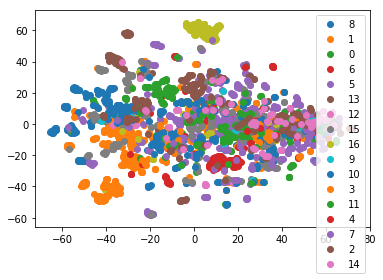

In [2]:
G = nx.read_edgelist('../data/wiki/Wiki_edgelist.txt',
                     create_using=nx.DiGraph(), nodetype=None, data=[('weight', int)])
model = SDNE(G, hidden_size=[256, 128],)
model.train(batch_size=3000, epochs=40, verbose=2)
embeddings = model.get_embeddings()

evaluate_embeddings(embeddings)
plot_embeddings(embeddings)